In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Simulation of Markov processes

### a)

In [ ]:
## Transition probablities:
m = np.array([[.2, .7, .1], 
              [.2, .5, .3], 
              [.2, .4, .4]])

### b)

In [38]:
## Determine the next state:

current_state = 1

states = [current_state]
for i in np.arange(0, 10):
    probs = m[current_state-1]
    next_state = np.random.choice(np.array([1, 2, 3]), 1, p=probs)
    current_state = next_state[0]
    states.append(current_state)
    
print("States:", states)

States: [1, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2]


## 2) Stationary distribution

### a) Theoretical stationary

In [14]:
## Estimate pi_inf:

n = 10000
m_inf = np.linalg.matrix_power(m, n)
pi_inf = np.dot(pi_0, m_n)
pi_inf

array([0.2       , 0.51111111, 0.28888889])

### b)

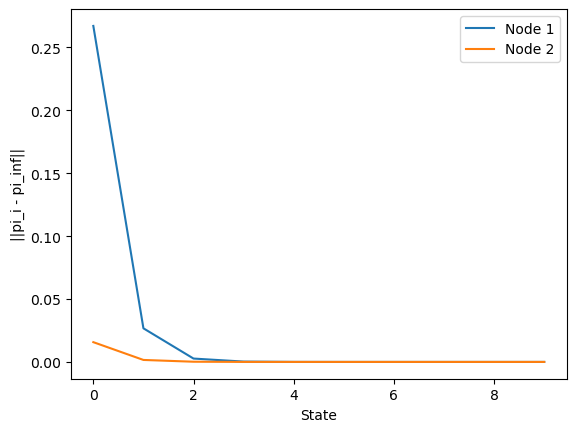

In [17]:
## Show that pi_i >> pi_inf

n_states = 11

## Starting in first node:
pi_0 = [1, 0, 0] 

pi_diff_norm_1 = []
for n in np.arange(1, n_states):
    m_n = np.linalg.matrix_power(m, n)
    pi_n = np.dot(pi_0, m_n)
    pi_diff = pi_n - pi_inf
    pi_diff_norm_1.append(np.linalg.norm(pi_diff, 2))

pi_0 = [0, 1, 0] 

pi_diff_norm_2 = []
for n in np.arange(1, n_states):
    m_n = np.linalg.matrix_power(m, n)
    pi_n = np.dot(pi_0, m_n)
    pi_diff = pi_n - pi_inf
    pi_diff_norm_2.append(np.linalg.norm(pi_diff, 2))

plt.plot(np.arange(0, n_states-1), pi_diff_norm_1, label="Node 1");
plt.plot(np.arange(0, n_states-1), pi_diff_norm_2, label="Node 2");
plt.legend(loc="upper right");
plt.xlabel("State");
plt.ylabel("||pi_i - pi_inf||");

## 3) Absorbing state

### a)

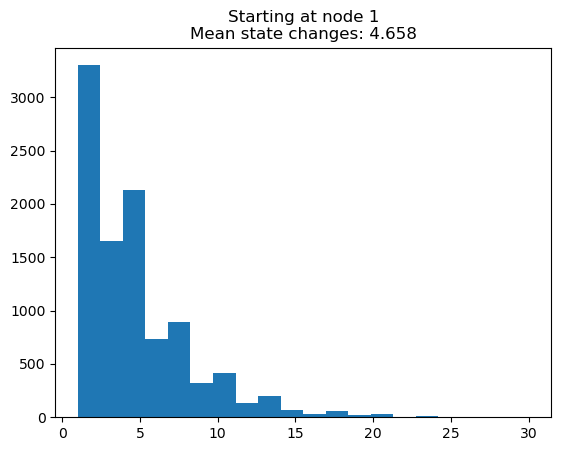

In [39]:
n_resamples = 10000

## Starting in first node:
## Count how many state changes needed to end up at 3rd node:

total_iter = []
for i in np.arange(0, n_resamples):
    current_state = 1
    iter_ = 0
    while current_state != 3:
        iter_ += 1
        probs = np.ndarray.flatten(m[current_state-1,])
        current_state = np.random.choice(np.array([1, 2, 3]), 1, p=probs)
    total_iter.append(iter_)

plt.hist(total_iter, bins=20);
plt.title(str("Starting at node 1\nMean state changes: " + str(round(np.mean(total_iter), 3))));

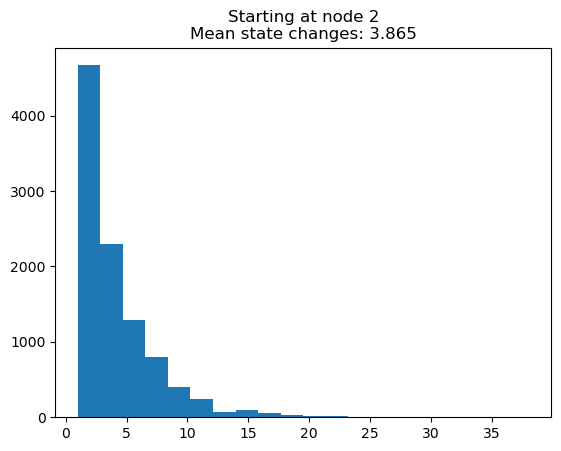

In [40]:
## Starting in second node:
## Count how many state changes needed to end up at 3rd node:

total_iter = []
for i in np.arange(0, n_resamples):
    current_state = 2
    iter_ = 0
    while current_state != 3:
        iter_ += 1
        probs = np.ndarray.flatten(m[current_state-1,])
        current_state = np.random.choice(np.array([1, 2, 3]), 1, p=probs)
    total_iter.append(iter_)
    
plt.hist(total_iter, bins=20);
plt.title(str("Starting at node 2\nMean state changes: " + str(round(np.mean(total_iter), 3))));